# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns


In [ ]:
pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет
pokemon.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


In [ ]:
pokemon_r = pokemon[pokemon['Class 1'].isin(['Rock'])]

In [ ]:
pokemon_R = pokemon_r[pokemon_r['Class 2'].isin(['Grass'])]  # получаем покемонов, которые принадлежат обоим классам
pokemon_R

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
377,378,Lileep,Rock,Grass,66,41,77,61,87,23,False
378,379,Cradily,Rock,Grass,86,81,97,81,107,43,False


In [ ]:
rock = pokemon_r[~pokemon_r.index.isin(pokemon_R.index)] # удаляем покемонов, которые принадлежат обоим классам
rock = rock['Attack']
rock.describe()

count     42.000000
mean      94.380952
std       35.176178
min       40.000000
25%       61.000000
50%       95.000000
75%      120.750000
max      165.000000
Name: Attack, dtype: float64

In [ ]:
grass = pokemon[pokemon['Class 1'].isin(['Grass'])]
grass = grass['Attack']
grass.describe()

count     70.000000
mean      73.214286
std       25.380520
min       27.000000
25%       55.000000
50%       70.000000
75%       93.500000
max      132.000000
Name: Attack, dtype: float64

In [ ]:
# из описательной статистики видно, что среднее значение и медиана силы обычной атаки (Attack) у класса Rock выше, чем у класса Grass

(3.6867299152069792, 0.0003544849009013808)

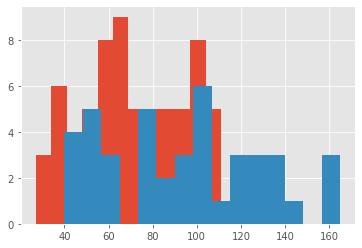

In [ ]:
plt.hist(grass, bins=15);
plt.hist(rock, bins=15);
t, p_value = stats.ttest_ind(rock, grass) # исходя из предположения о нормлаьности распределения, а также уровне значимости 0.05
t, p_value                                # получаем p-value < 0.05 => отклоняем Н0, значит данные статистически значимо различны

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
water = pokemon[pokemon['Class 1'].isin(['Water'])]
water = water['Speed']
water.describe()

count    112.000000
mean      65.964286
std       23.019353
min       15.000000
25%       50.000000
50%       65.000000
75%       82.000000
max      122.000000
Name: Speed, dtype: float64

In [ ]:
normal = pokemon[pokemon['Class 1'].isin(['Normal'])]
normal = normal['Speed']
normal.describe()

count     98.000000
mean      71.551020
std       28.406157
min        5.000000
25%       50.000000
50%       71.000000
75%       90.750000
max      135.000000
Name: Speed, dtype: float64

In [ ]:
# из описательной статистики видно, что покемоны в классе Normal в среднем более быстрые, чем покемоны в классе Water.

(-1.5732662827713622, 0.11717700803357904)

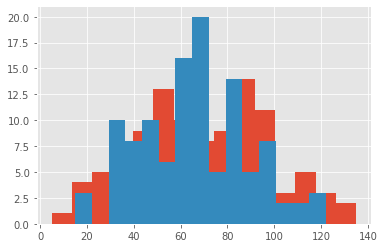

In [ ]:
plt.hist(normal, bins=15);
plt.hist(water, bins=15);
t, p_value = stats.ttest_ind(water, normal) # исходя из предположения о нормлаьности распределения, а также уровне значимости 0.05
t, p_value                                # получаем p-value > 0.05 => нет оснований отклонить Н0, значит данные статистически значимо не отличаются

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [ ]:
treated = pokemon[pokemon['Name'].isin(treathed_pokemon)]
treated = treated['Speed']
treated.describe()

count      4.000000
mean     145.000000
std        7.071068
min      135.000000
25%      142.500000
50%      147.500000
75%      150.000000
max      150.000000
Name: Speed, dtype: float64

In [ ]:
general = pokemon[~pokemon.index.isin(treated.index)]
general = general['Speed']
general.describe()

count    796.000000
mean      67.891960
std       28.614785
min        5.000000
25%       45.000000
50%       65.000000
75%       90.000000
max      180.000000
Name: Speed, dtype: float64

In [ ]:
# Из описательной статистики видно, что покемоны с сывороткой в среднем быстрее остальных (145 vs 67)

In [ ]:
t, p_value = stats.ttest_ind(general, treated) # исходя из предположения о нормлаьности распределения, а также уровне значимости 0.05
t, p_value                                # получаем p-value < 0.05 => отклоняем Н0, значит данные статистически значимо отличаются, и сыворотка действует

(-5.385407401082377, 9.51510117630786e-08)

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# условия задачи идентично заданию №3

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
pokemon['sum'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense']
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134


In [ ]:
pokemon['comp'] = pokemon['HP'] * pokemon['Attack'] * pokemon['Defense']
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum,comp
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204


In [ ]:
legend_sum = pokemon[pokemon['Legendary'] == True]
legend_sum = legend_sum['sum']
legend_sum.describe()

count     65.000000
mean     309.076923
std       46.429822
min      230.000000
25%      275.000000
50%      305.000000
75%      340.000000
max      440.000000
Name: sum, dtype: float64

In [ ]:
legend_comp = pokemon[pokemon['Legendary'] == True]
legend_comp = legend_comp['comp']
legend_comp.describe()

count    6.500000e+01
mean     1.085942e+06
std      5.169911e+05
min      1.800000e+05
25%      6.885000e+05
50%      1.000000e+06
75%      1.350000e+06
max      2.880000e+06
Name: comp, dtype: float64

In [ ]:
general_sum = pokemon[~pokemon.index.isin(legend_sum.index)]
general_sum = general_sum['sum']
general_sum.describe()

count    735.000000
mean     214.410884
std       64.359599
min       55.000000
25%      165.000000
50%      213.000000
75%      258.000000
max      440.000000
Name: sum, dtype: float64

In [ ]:
general_comp = pokemon[~pokemon.index.isin(legend_comp.index)]
general_comp = general_comp['comp']
general_comp.describe()

count    7.350000e+02
mean     4.250414e+05
std      3.713542e+05
min      2.500000e+03
25%      1.512250e+05
50%      3.315000e+05
75%      5.735375e+05
max      2.460000e+06
Name: comp, dtype: float64

In [ ]:
 # описательная статистика показывает, что среднее суммы и произвдений характеристик HP,Attack,Defense у легендарных покемонов выше, чем у других покемонов

In [ ]:
t, p_value = stats.ttest_ind(legend_sum, general_sum) # исходя из предположения о нормлаьности распределения, а также уровне значимости 0.05
t, p_value                                            # получаем p-value < 0.05 => отклоняем Н0, значит данные (сумма характеристик) статистически значимо отличаются

(11.591852366462316, 7.970942205722087e-29)

In [ ]:
t, p_value = stats.ttest_ind(legend_comp, general_comp) # исходя из предположения о нормлаьности распределения, а также уровне значимости 0.05
t, p_value                                            # получаем p-value < 0.05 => отклоняем Н0, значит данные (произведения характеристик) статистически значимо отличаются

(13.263253408231844, 1.992664308842282e-36)

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [ ]:
best = pokemon[pokemon['Class 1'].isin(best_defence_class)]
best = best[['Class 1', 'Defense']]
best.describe()

,Defense
count,127.000000
mean,96.661417
std,41.428121
min,15.000000
25%,68.500000
50%,91.000000
75%,119.500000
max,230.000000


In [ ]:
best_by_class = best.groupby('Class 1').mean().sort_values('Defense', ascending=False) # посмотрим на средние оценки по классам
best_by_class

,Defense
Class 1,
Steel,126.370370
Rock,100.795455
Ground,84.843750
Ice,71.416667


Среднее по всей выборке:  96.66141732283465


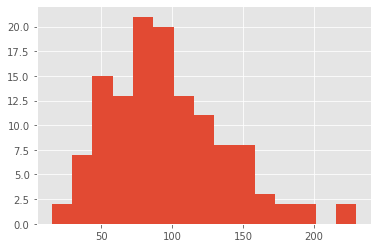

In [ ]:
best['Defense'].hist(bins=15)
print('Среднее по всей выборке: ',best['Defense'].mean())

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


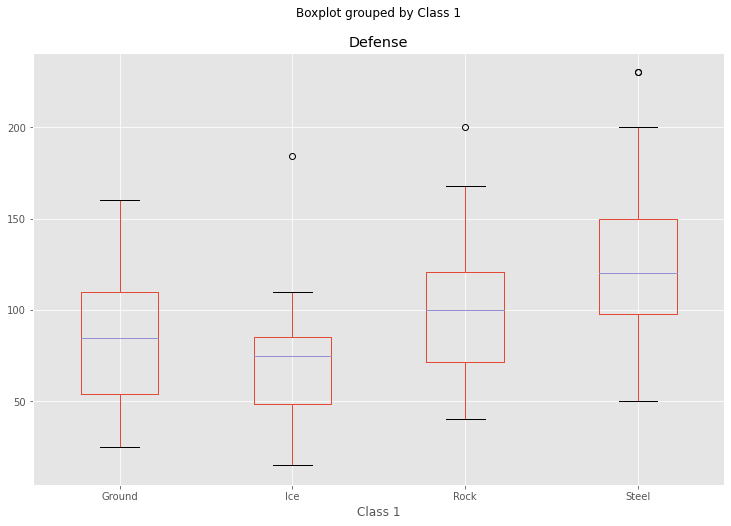

In [ ]:
data = best
data.boxplot('Defense', by='Class 1', figsize=(12, 8));    # Судя по ящику с усами, медианы будет отличаться статистически значимо

In [ ]:
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
import scipy.stats as stats

f, p = f_oneway(best[best['Class 1'] == 'Rock']['Defense'],
                best[best['Class 1'] == 'Ground']['Defense'],
                best[best['Class 1'] == 'Steel']['Defense'],
                best[best['Class 1'] == 'Ice']['Defense'])
f, p    # получаем p-value < 0.05 => отклоняем Н0, значит классы покемонов отличаются по уровню защиты статистически значимо

(10.576882027817977, 3.0803014649204294e-06)